# Data Sets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model

In [ ]:
data = pd.ExcelFile('PATIENT2.xlsx')
data0 = pd.ExcelFile('CONTROL2.xlsx')

AAo = pd.read_excel(data,"AAo")
AAo0 = pd.read_excel(data0,"AAo")
AArch = pd.read_excel(data,"AArch")
AArch0 = pd.read_excel(data0,"AArch")

AAo = AAo.drop(["Diameter"], axis=1)
AAo = AAo.drop(AAo[AAo["Classification"]==3].index)
AAo0 = AAo0.drop(["Diameter"], axis=1)
AAo0 = AAo0.drop(AAo0[AAo0["Classification"]==3].index)

AArch = AArch.drop(["Diameter"], axis=1)
AArch = AArch.drop(AArch[AArch["Classification"]==3].index)
AArch0 = AArch0.drop(["Diameter"], axis=1)
AArch0 = AArch0.drop(AArch0[AArch0["Classification"]==3].index)

AAo_and_AArch = pd.concat([AAo, AArch], axis = 0)
Control_AAo_and_AArch = pd.concat([AAo0, AArch0], axis = 0)
Base = AAo_and_AArch

In [ ]:
#Pacientes tipo 0
Control_AAo_and_AArch = pd.concat([AAo0, AArch0], axis = 0)

#Pacientes tipo 1
PAT1 = AAo_and_AArch.drop(AAo_and_AArch[AAo_and_AArch["Classification"]==2].index)

#Pacientes tipo 2
PAT2 = Base.drop(Base[Base["Classification"]==1].index)


In [ ]:
PAT0 = Control_AAo_and_AArch.drop(["Classification"], axis=1)
PAT1 = PAT1.drop(["Classification"], axis=1)
PAT2 = PAT2.drop(["Classification"], axis=1)

0-1

0-2

1-2

0-1-2

In [ ]:
PAT0and1 = pd.concat([PAT0, PAT1], axis = 0)
PAT0and2 = pd.concat([PAT0, PAT2], axis = 0)
PAT1and2 = pd.concat([PAT1, PAT2], axis = 0)
PAT012 = pd.concat([PAT0, PAT1, PAT2], axis = 0)

combinations = [(PAT0and1,"Pacientes 0-1"), (PAT0and2, "Pacientes 0-2"), (PAT1and2, "Pacientes 1-2"), (PAT012, "Pacientes 0-1-2")]

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

https://scikit-learn.org/stable/modules/linear_model.html?highlight=linear+regression

https://www.kaggle.com/code/divan0/multiple-linear-regression

https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners




In [21]:
def LinearPlot(df,nombre_clase):
  for params in df:
    X = df["Age"].values.reshape(-1,1)
    y = df[params].values

  ################################################ Train #############################################

    ols = linear_model.LinearRegression()
    model = ols.fit(X, y)
    response = model.predict(X)

  ############################################## Evaluate ############################################

    r2 = model.score(X, y)

  ############################################## Plot ################################################

    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(X, response, color='k', label='Regression model')
    ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label=params)
    ax.set_ylabel(params, fontsize=14)
    ax.set_xlabel('Age', fontsize=14)
    ax.legend(facecolor='white', fontsize=11)
    ax.set_title(f'{params} en {nombre_clase}: $R^2= %.2f$' % r2, fontsize=18)

    fig.tight_layout()

# Regresión Lineal Pacientes 0-1

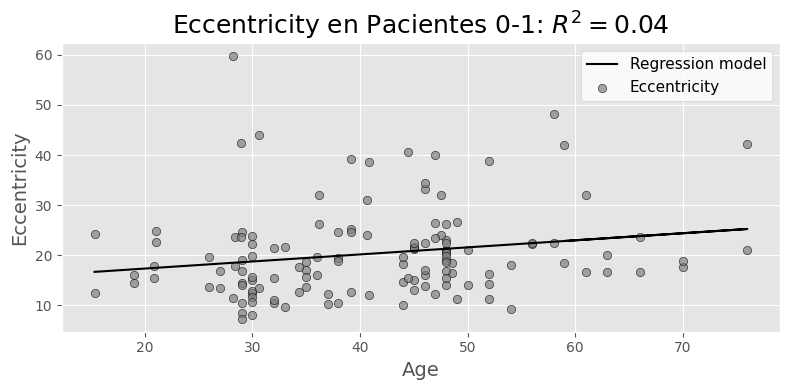

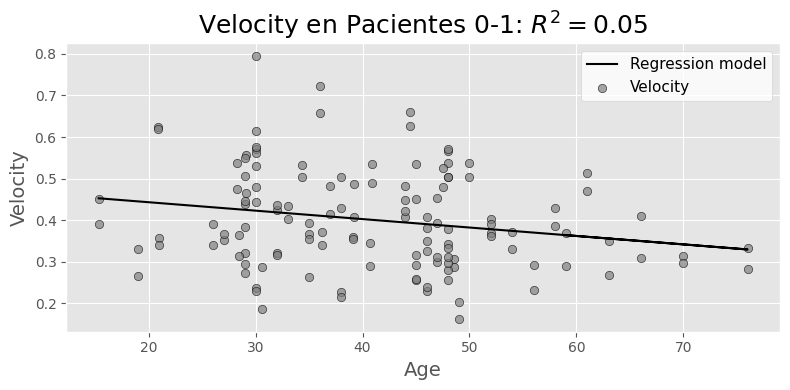

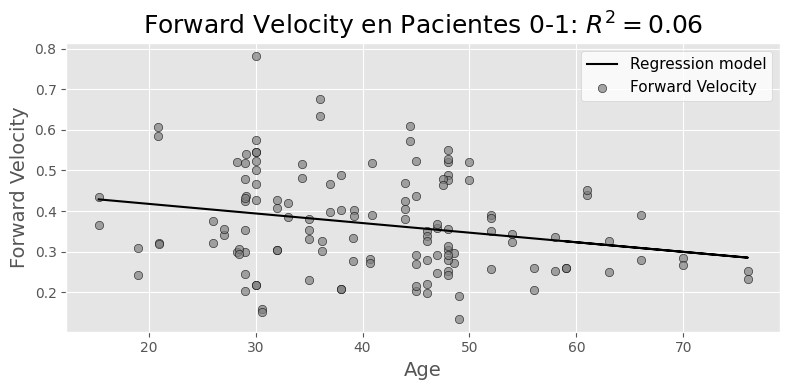

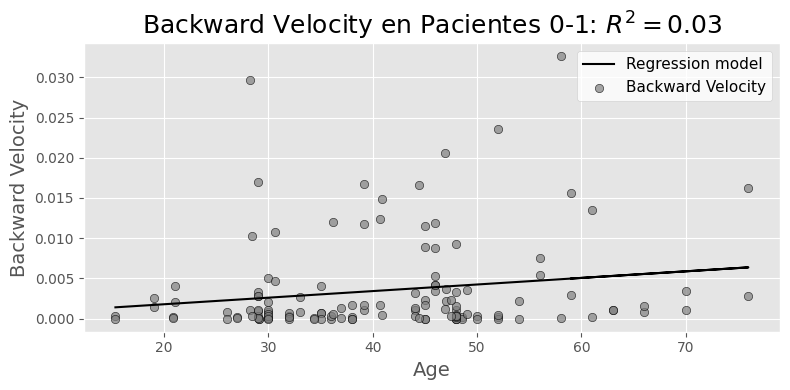

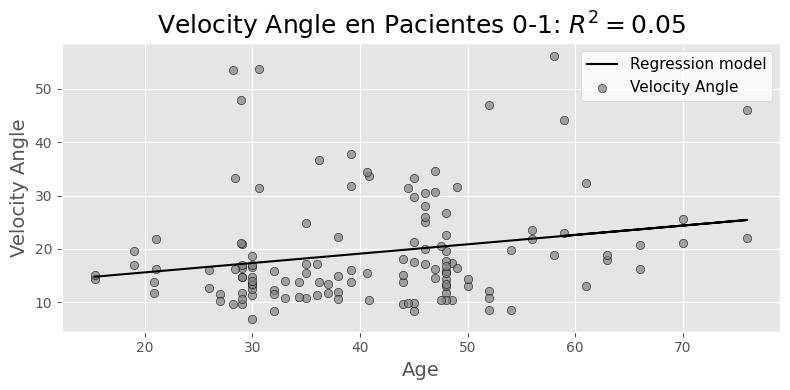

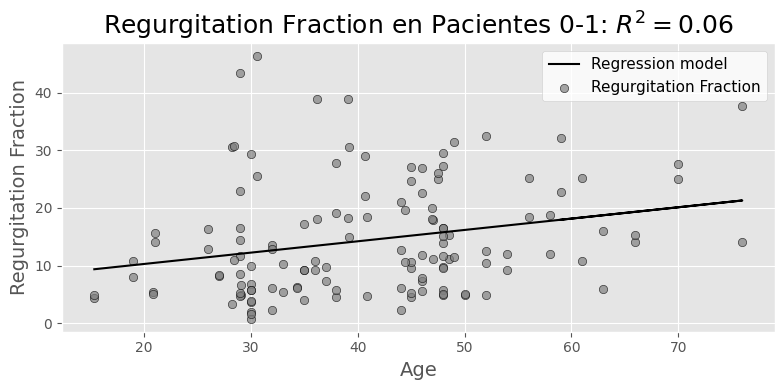

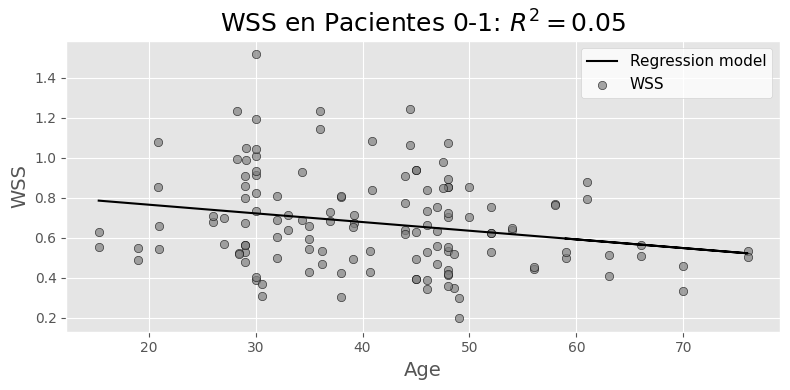

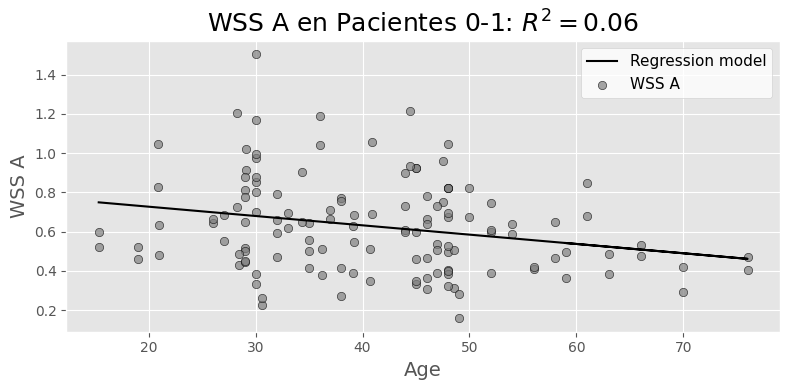

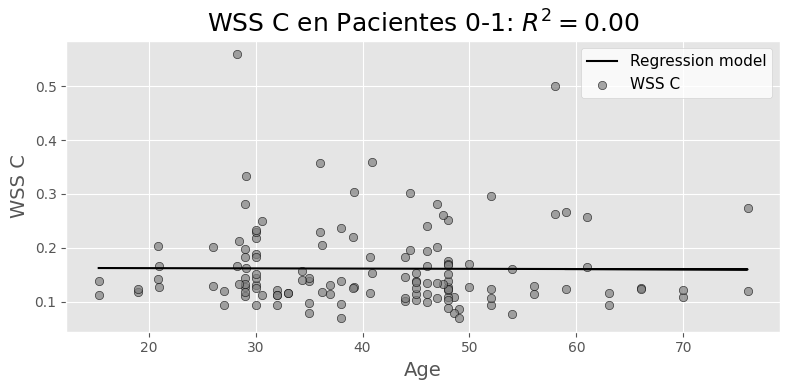

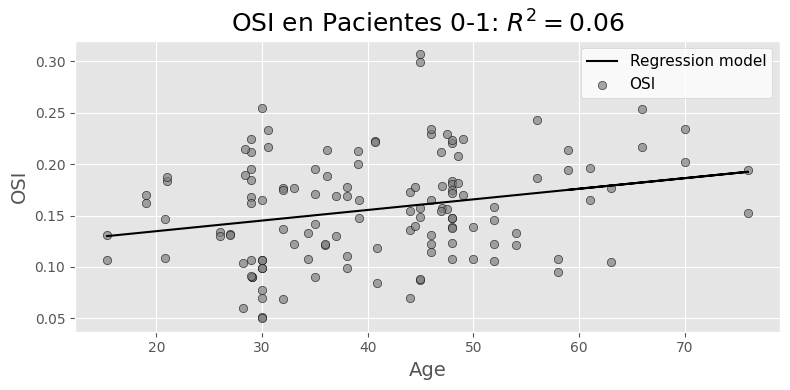

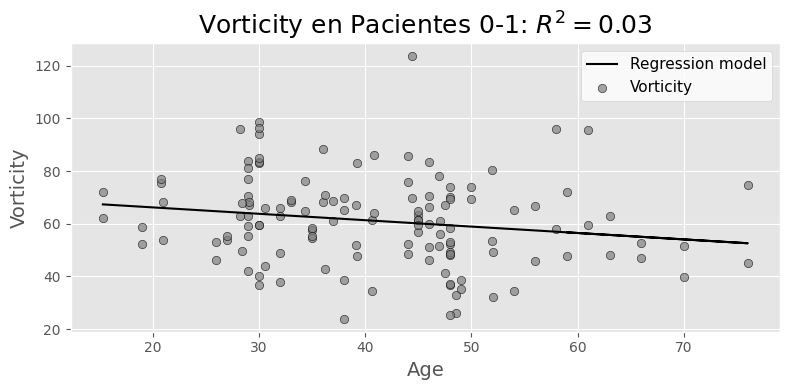

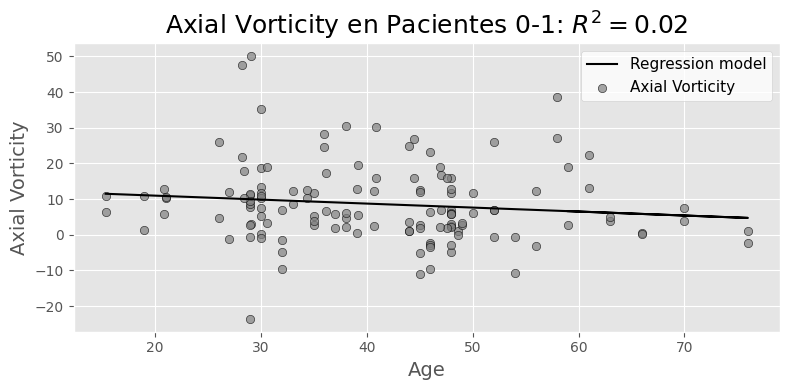

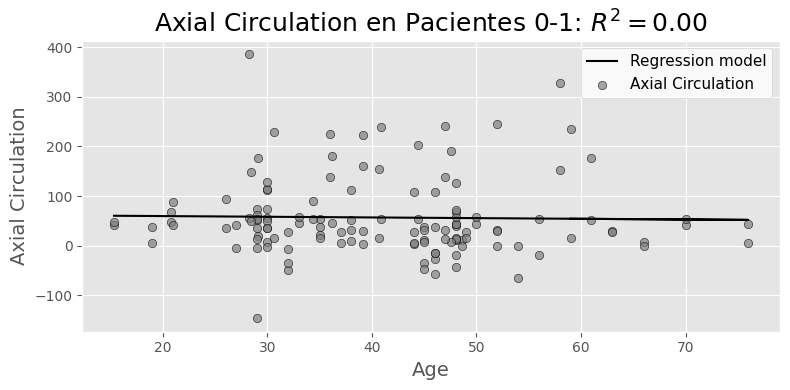

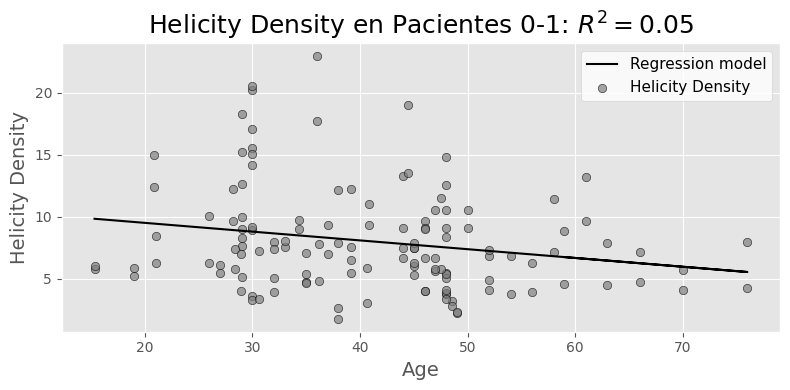

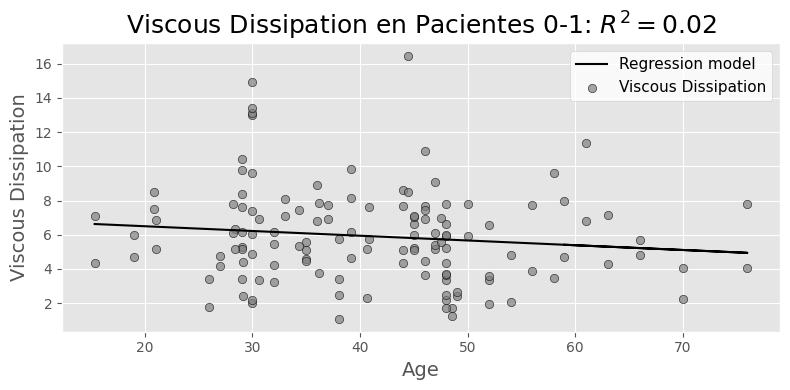

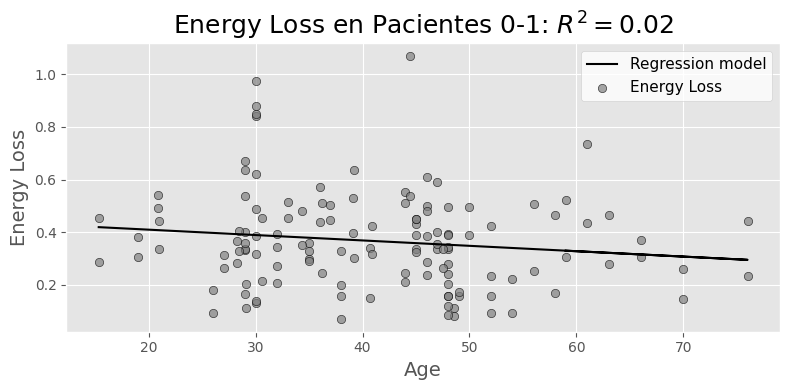

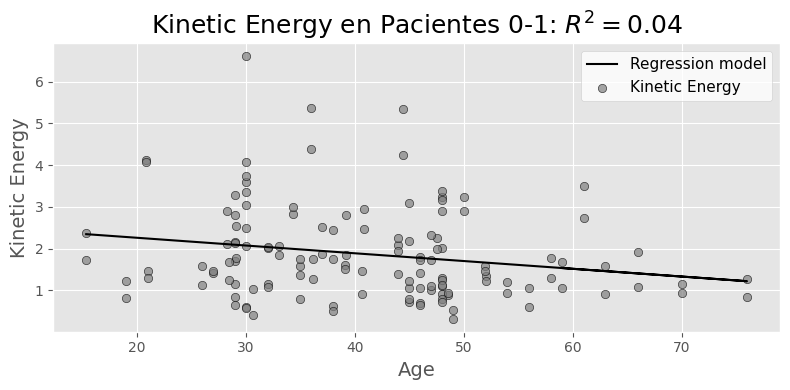

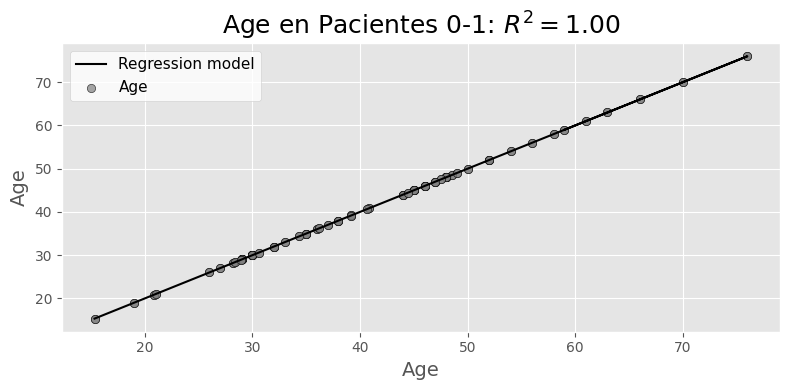

In [23]:
LinearPlot(PAT0and1, "Pacientes 0-1")

# Regresion Lineal Pacientes 0-2

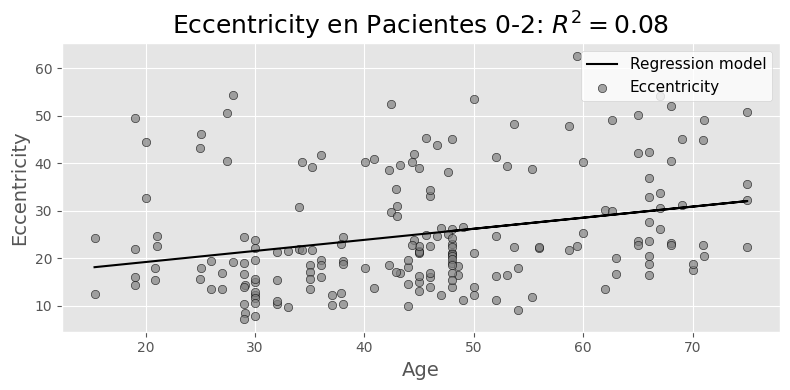

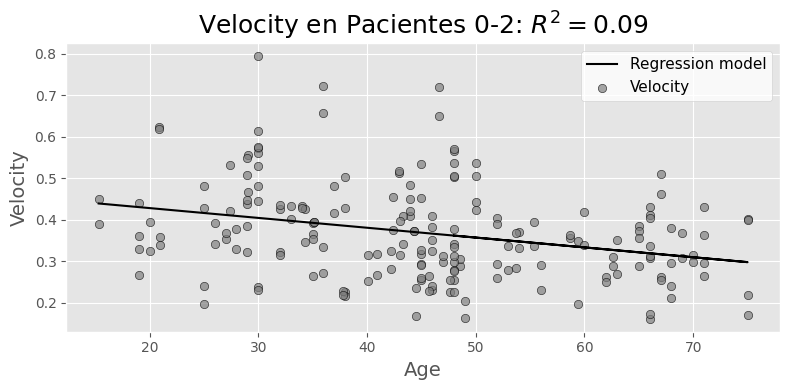

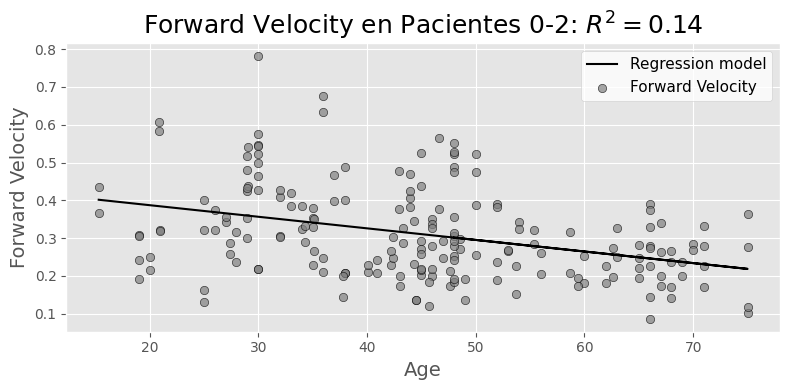

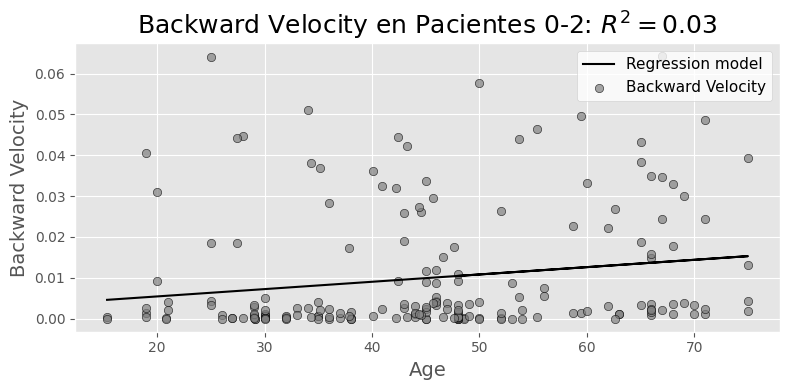

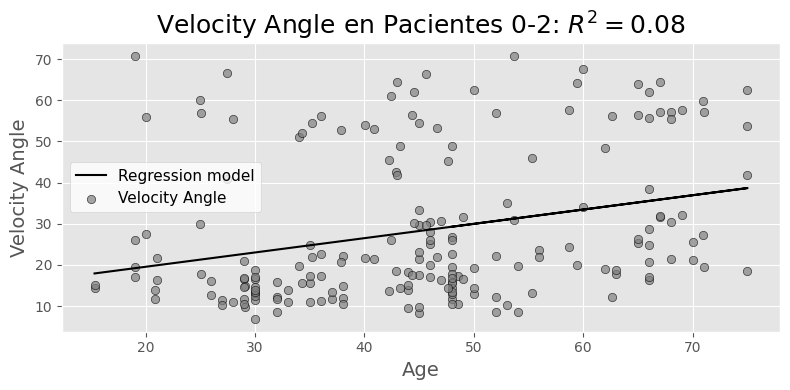

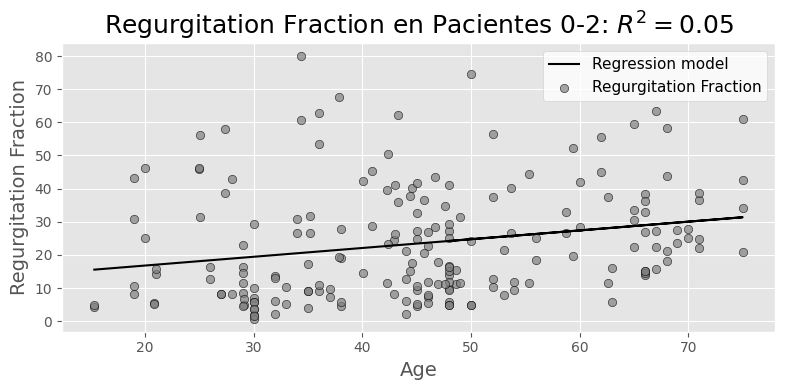

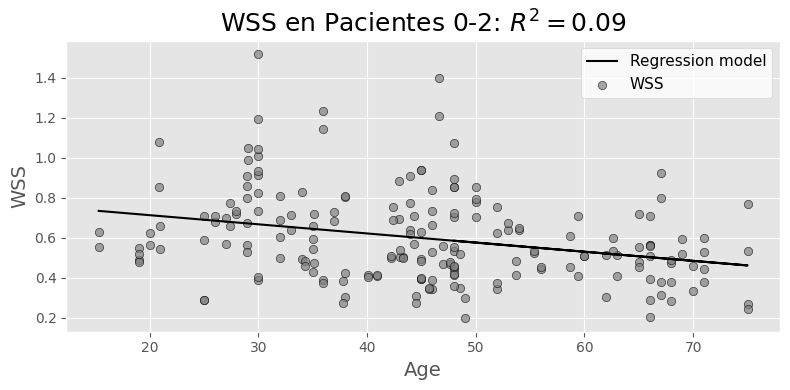

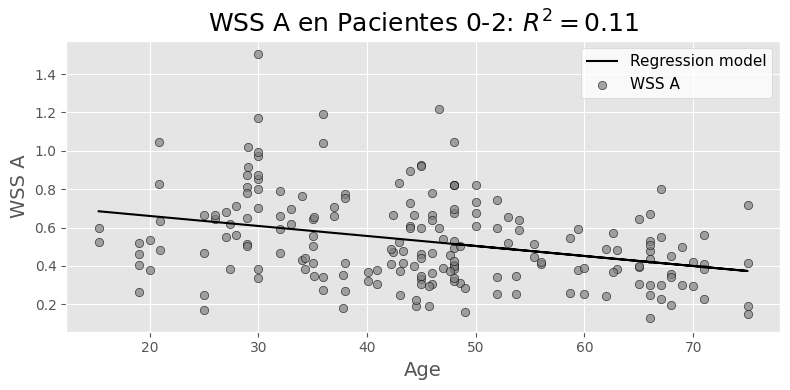

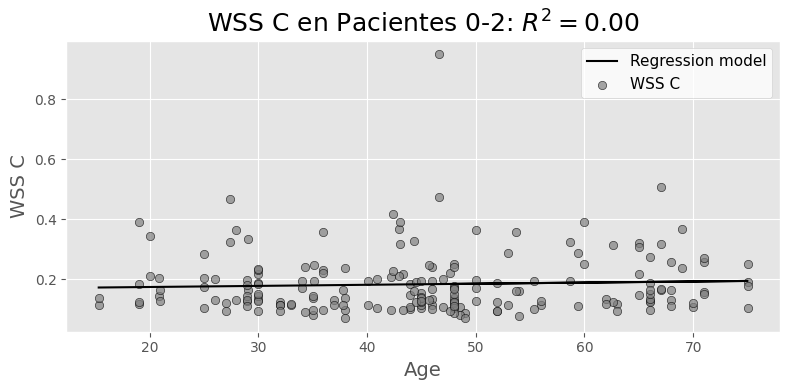

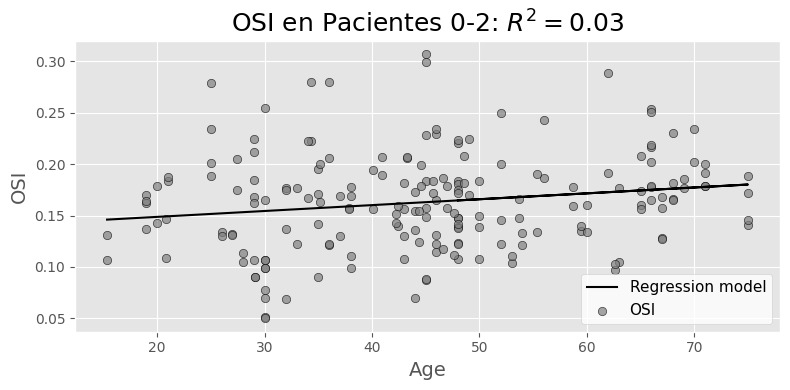

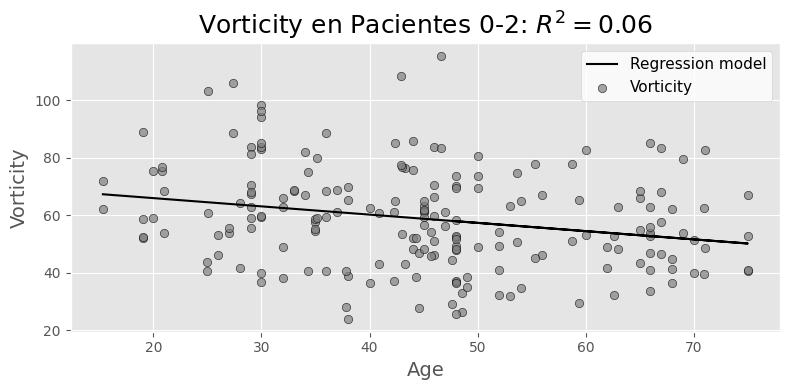

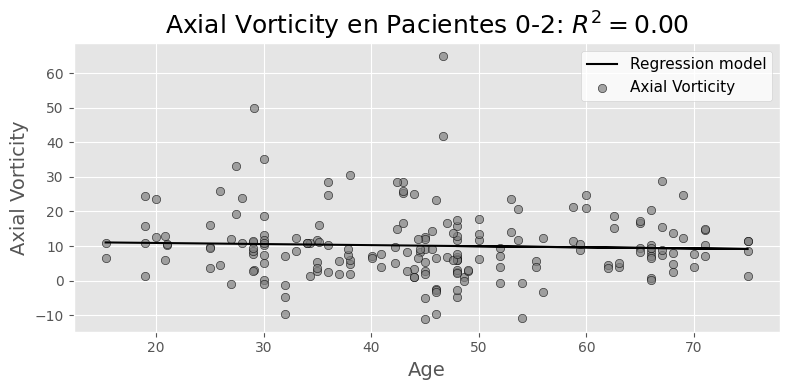

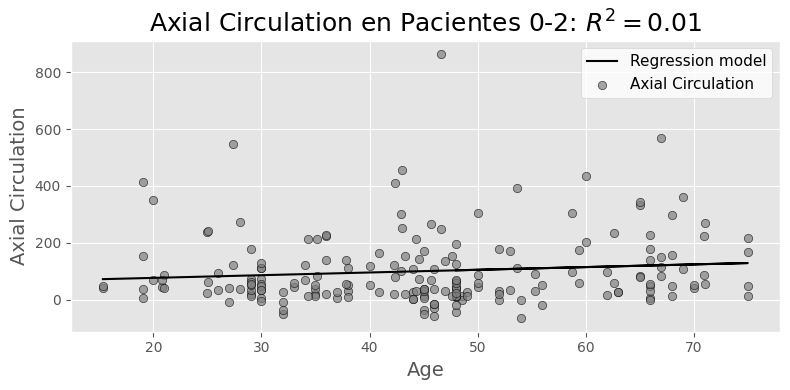

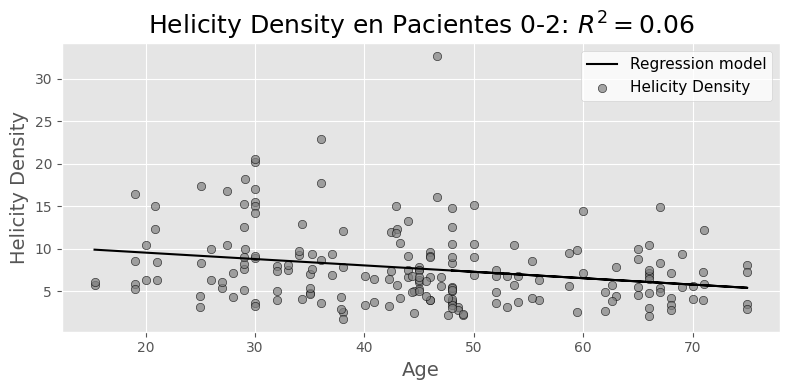

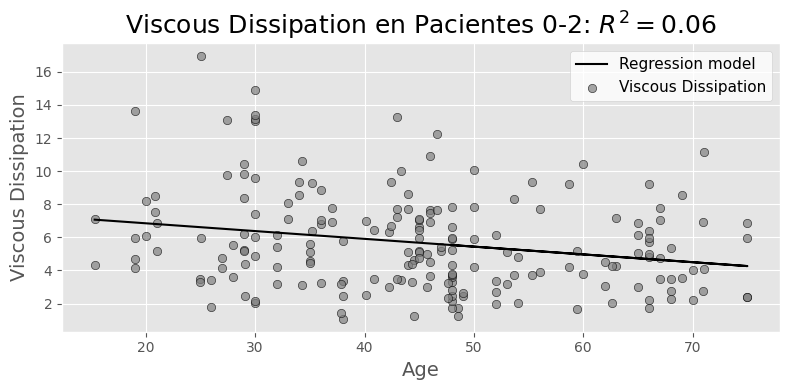

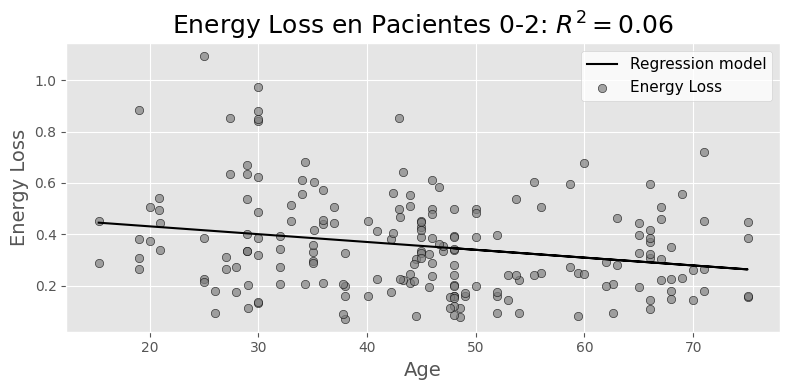

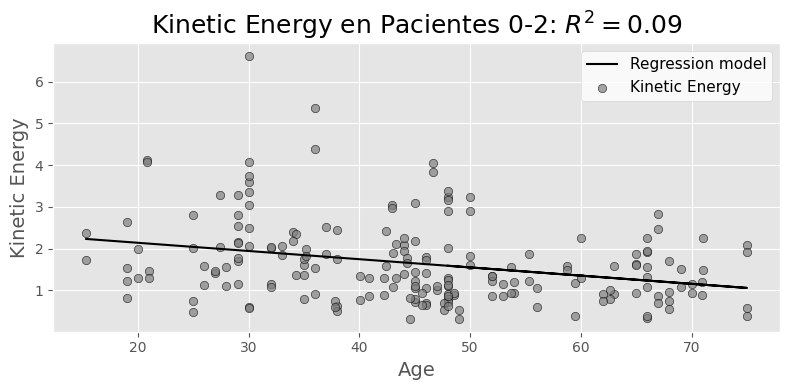

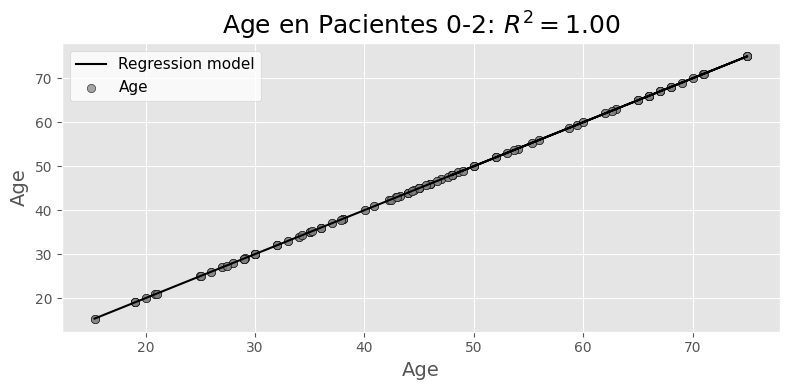

In [24]:
LinearPlot(PAT0and2, "Pacientes 0-2")

# Regresión Lineal Pacientes 1-2

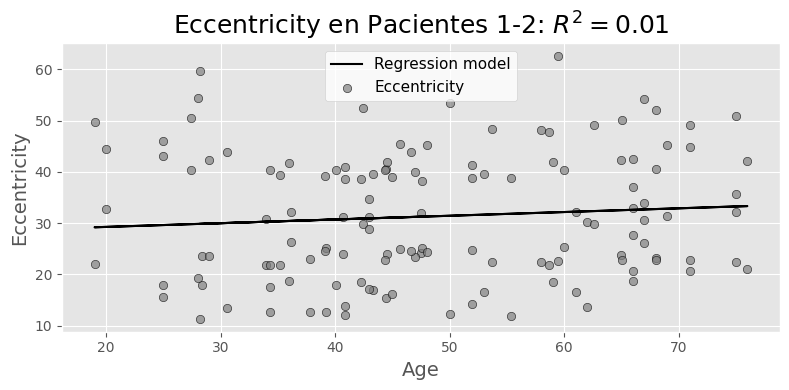

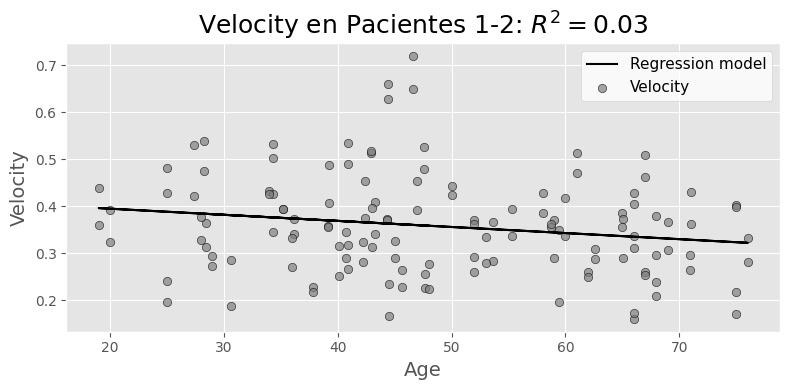

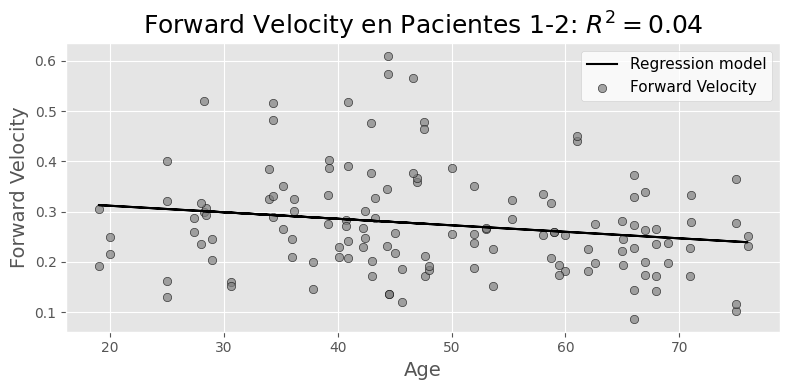

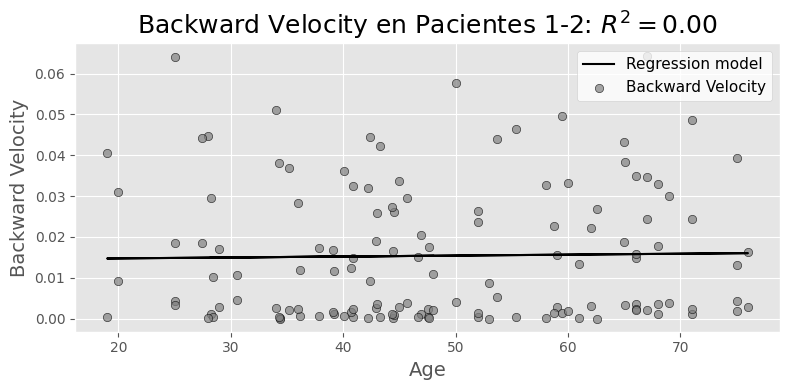

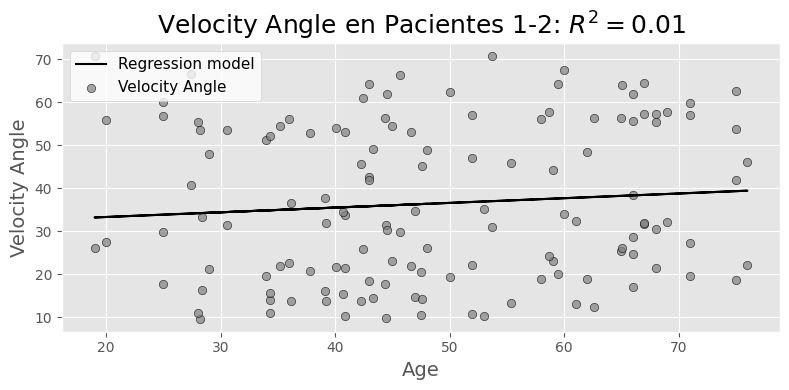

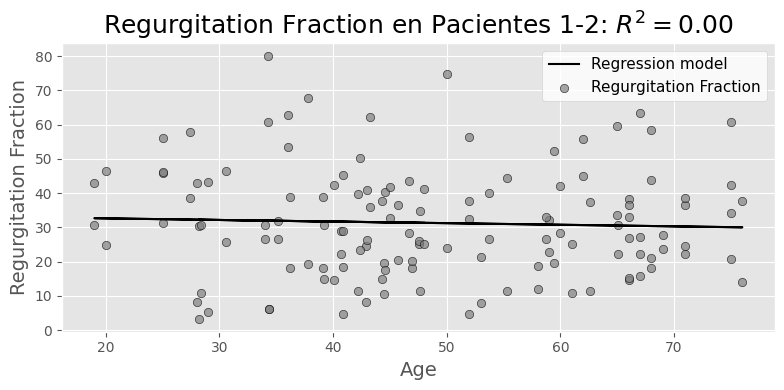

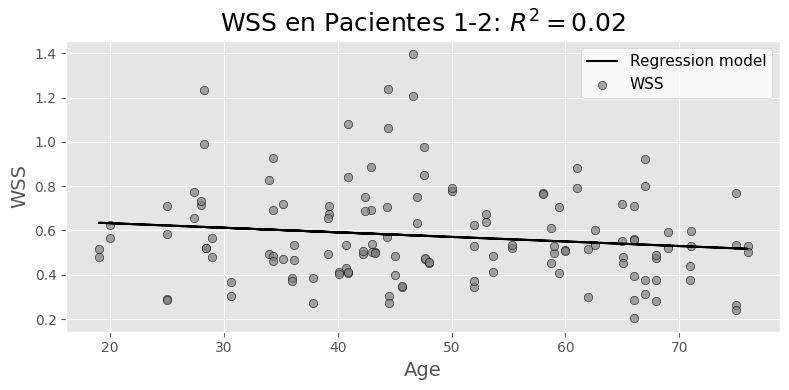

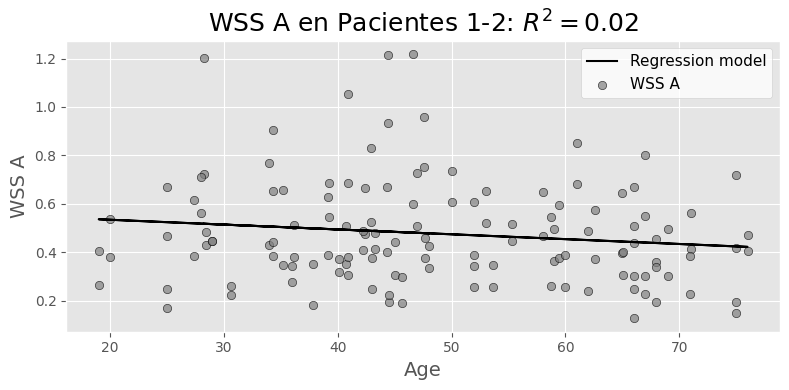

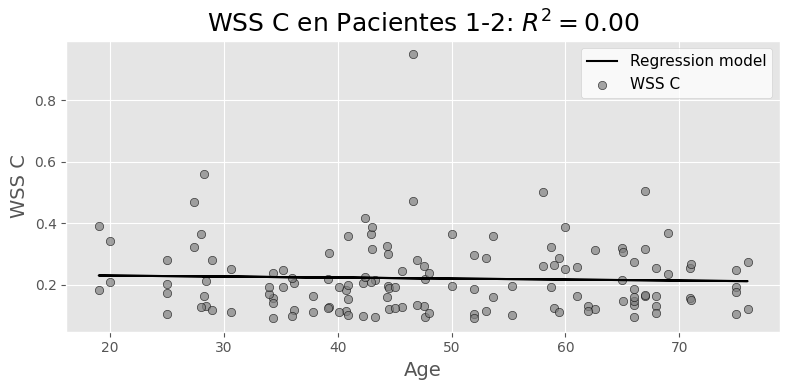

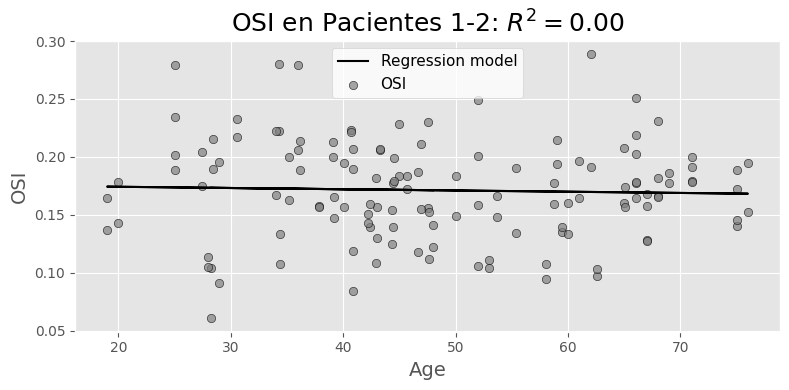

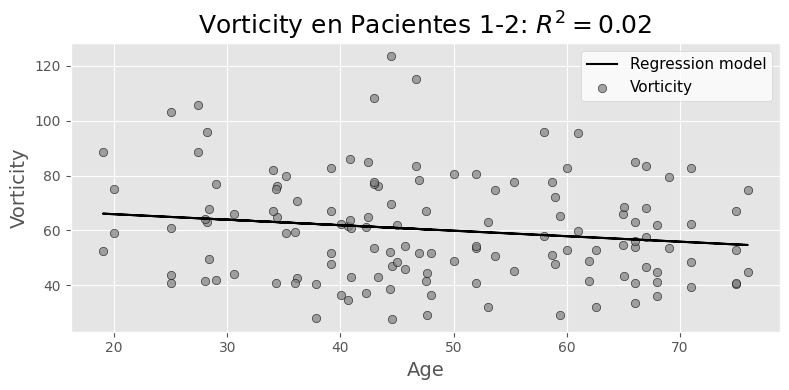

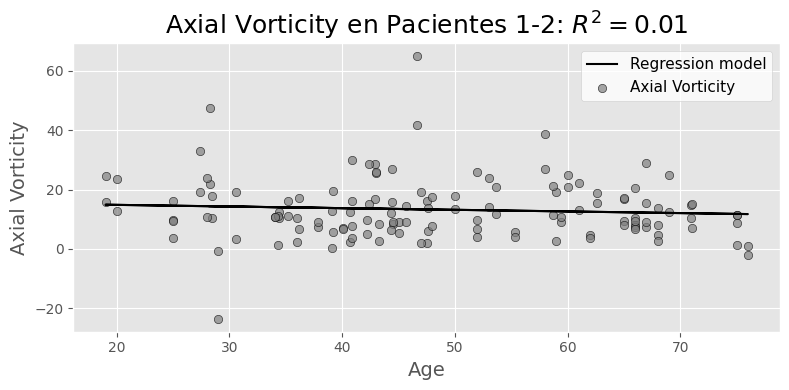

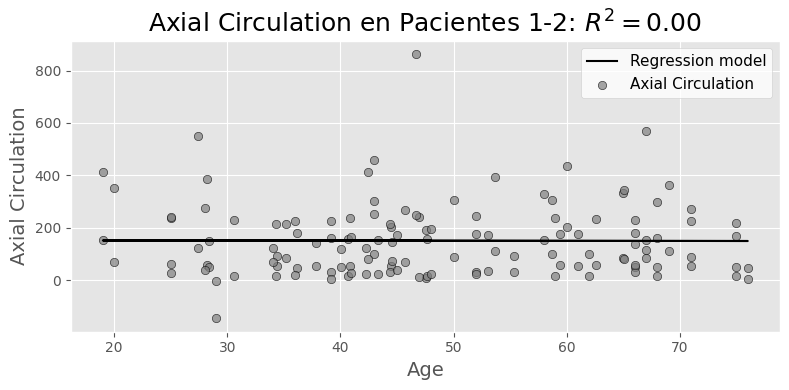

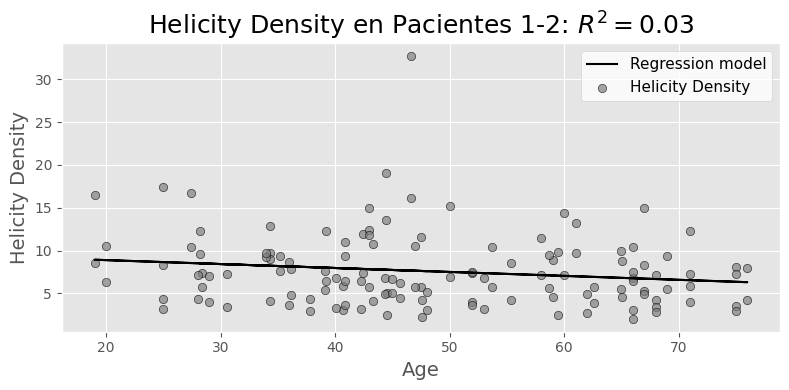

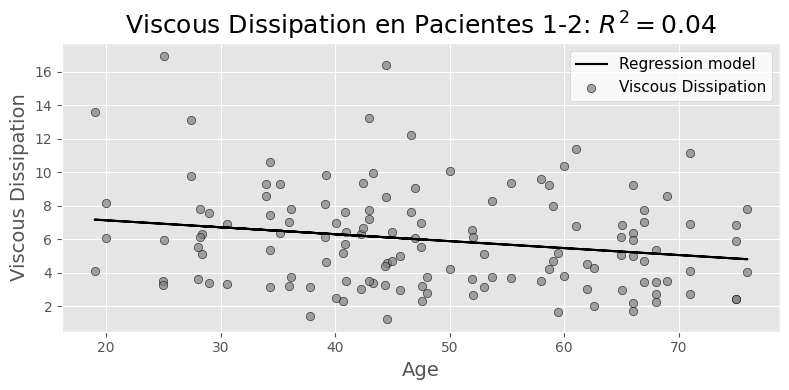

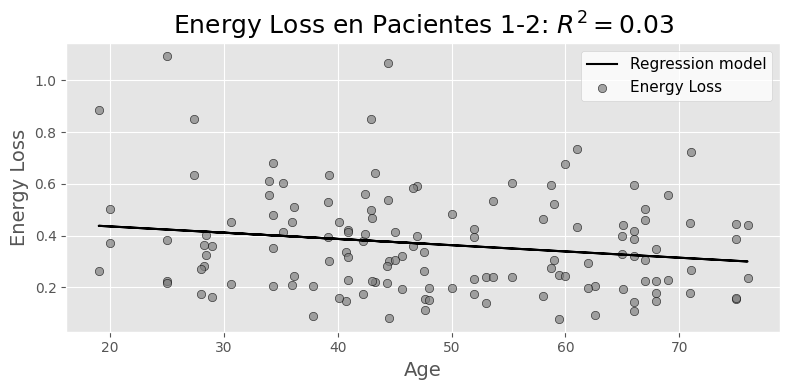

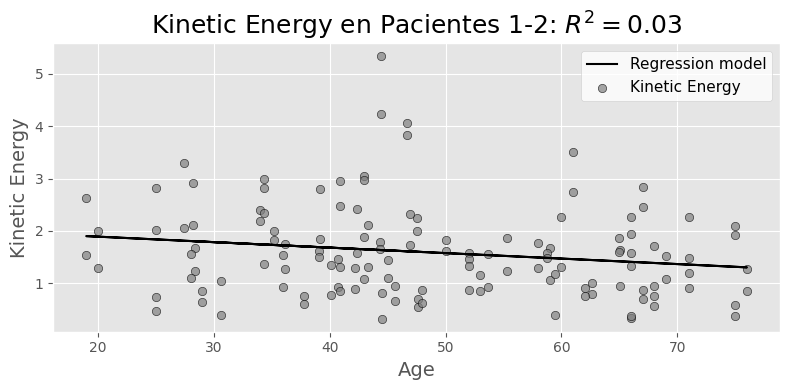

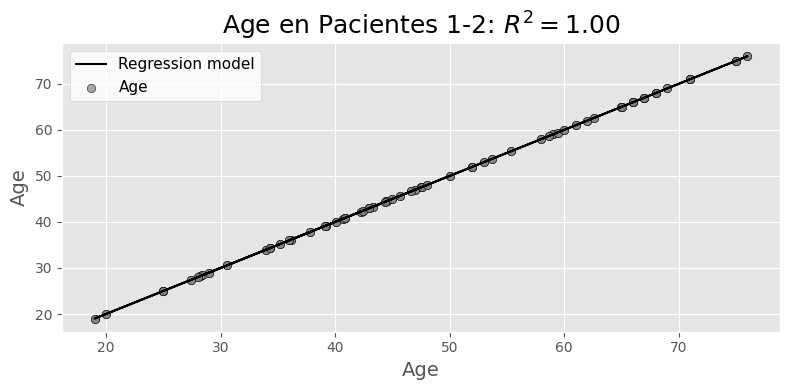

In [25]:
LinearPlot(PAT1and2, "Pacientes 1-2")

# Regresión Lineal Pacientes 0-1-2

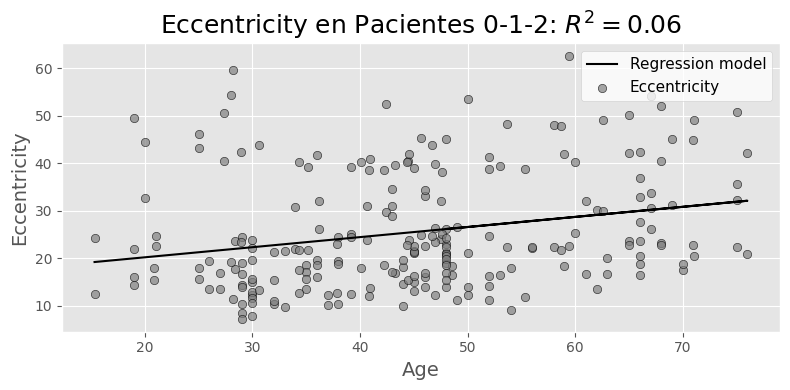

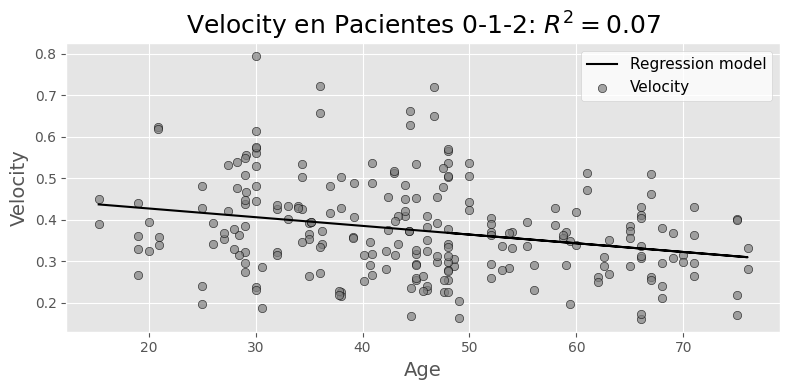

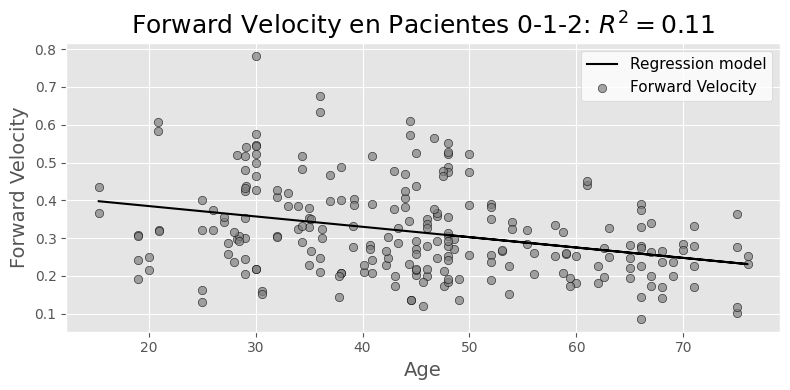

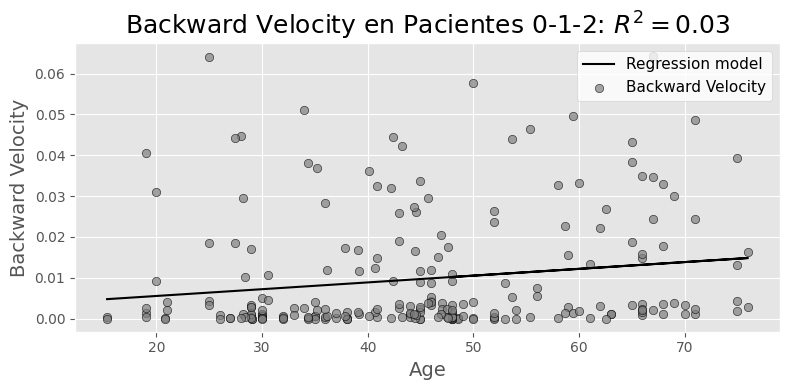

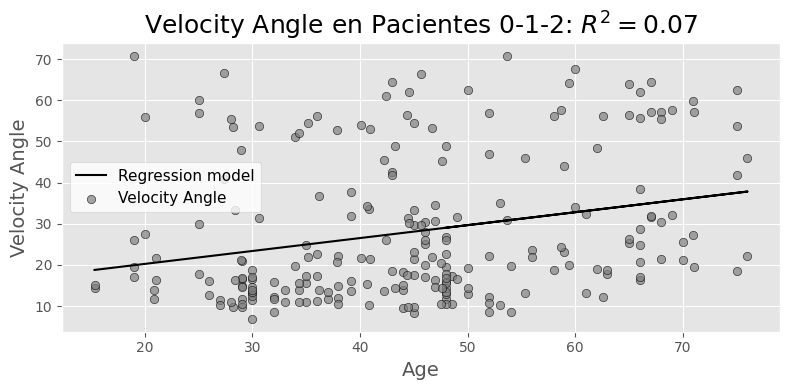

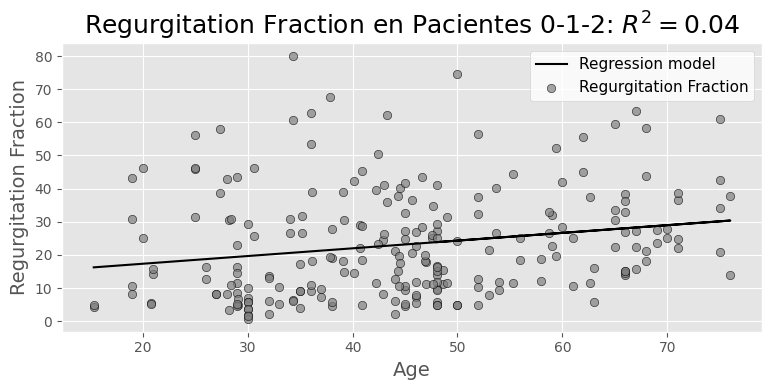

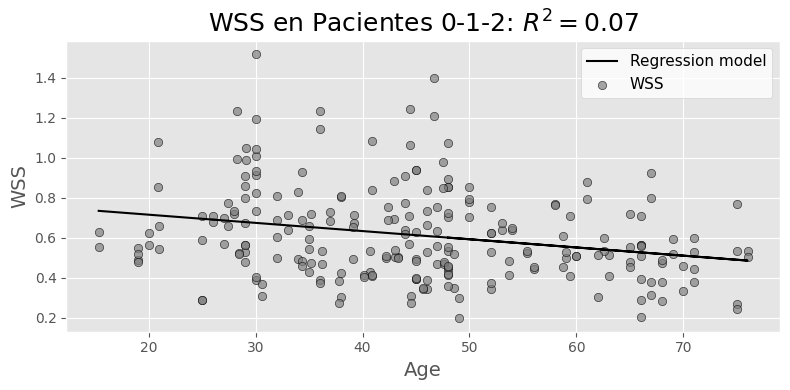

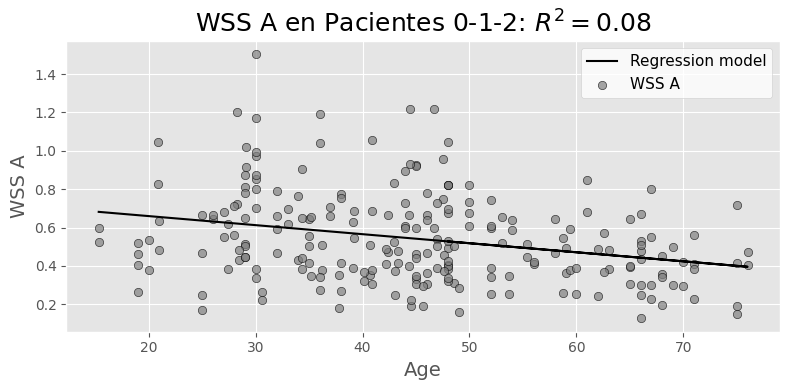

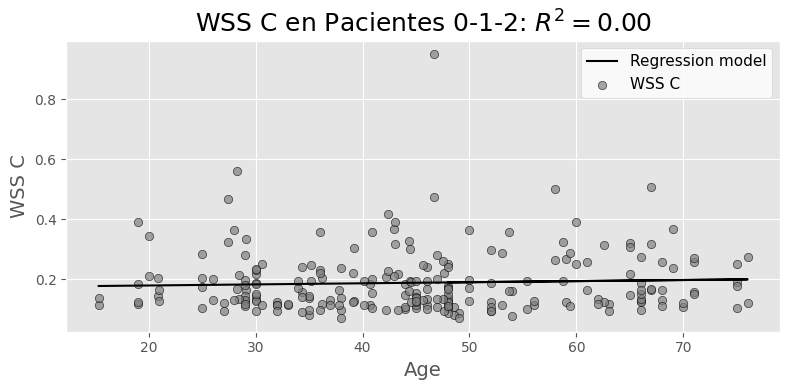

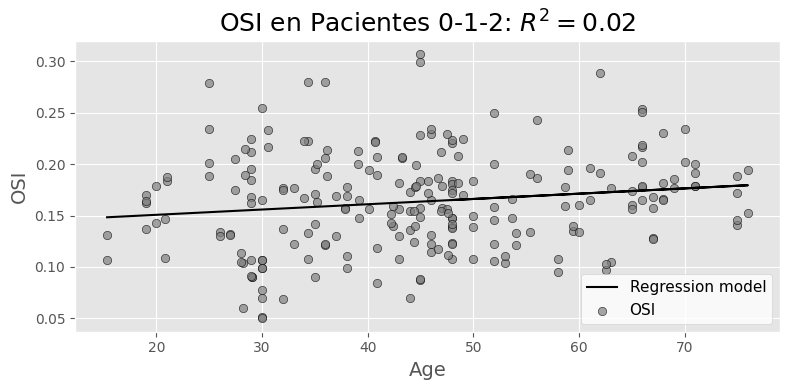

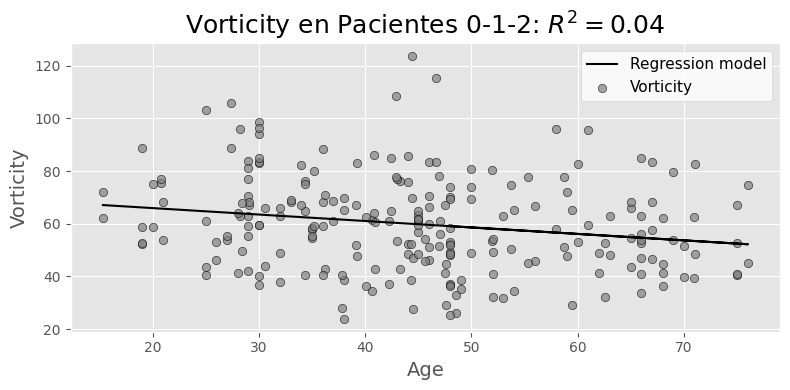

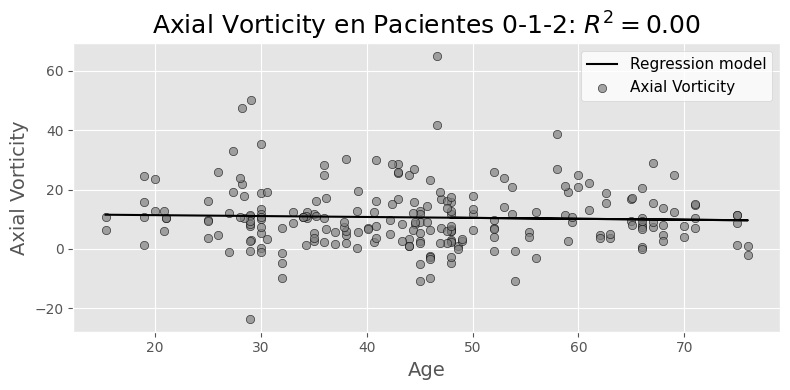

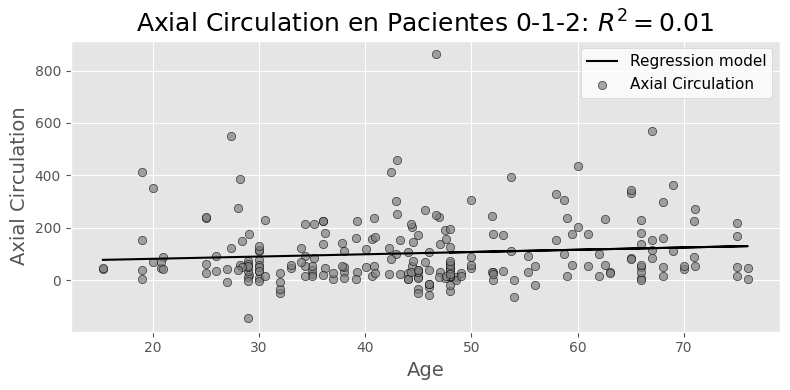

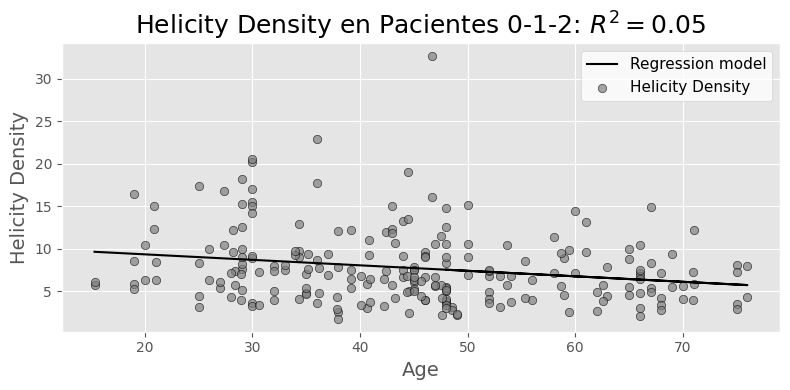

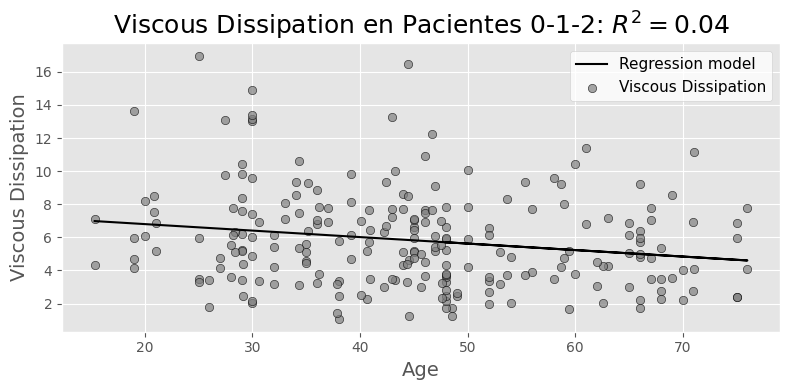

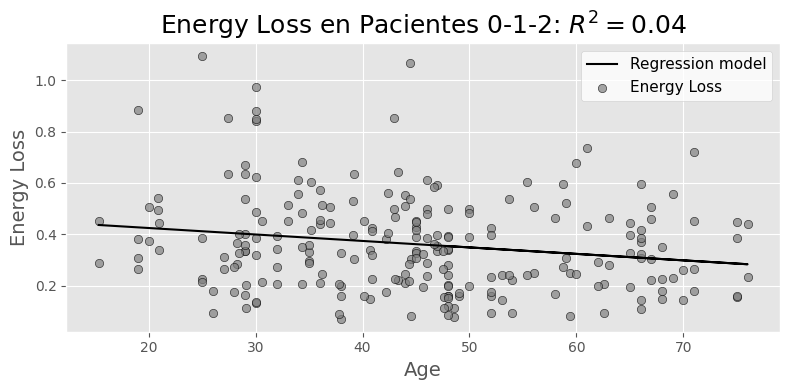

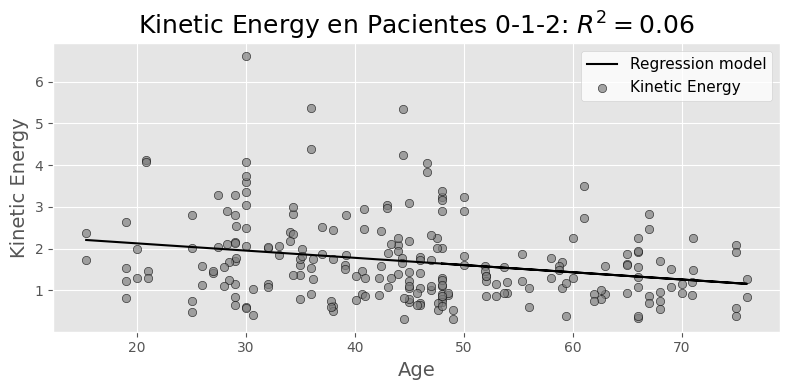

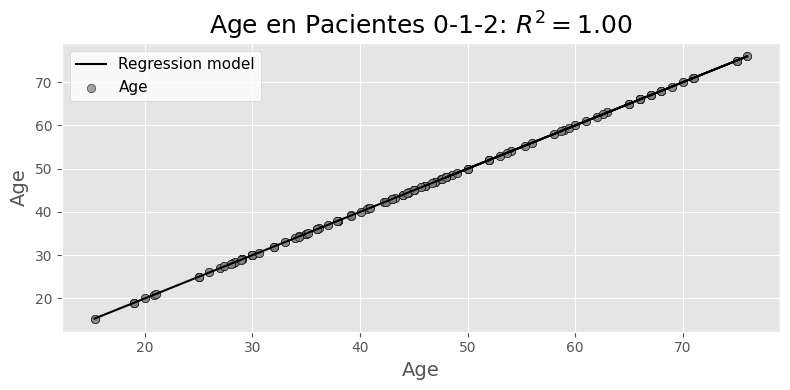

In [26]:
LinearPlot(PAT012, "Pacientes 0-1-2")